In [1]:
#Load libraries
import warnings
warnings.filterwarnings("ignore")
import numpy
import pandas as pd
from pandas import read_csv
from pandas import set_option
import seaborn
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier

# 1. Read and explore the dataset

In [3]:
#load dataset
name = 'breast_cancer_data_2.csv'
dataset = read_csv(name)
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#shape
dataset.shape

(569, 33)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
dataset.index = dataset['id']
dataset = dataset.drop(['id', 'Unnamed: 32'], axis=1)
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11,0.12,0.24,0.14,0.17,...,25.45,26.40,166.10,2027.0,0.14,0.21,0.41,0.22,0.21,0.07
926682,M,20.13,28.25,131.20,1261.0,0.10,0.10,0.14,0.10,0.18,...,23.69,38.25,155.00,1731.0,0.12,0.19,0.32,0.16,0.26,0.07
926954,M,16.60,28.08,108.30,858.1,0.08,0.10,0.09,0.05,0.16,...,18.98,34.12,126.70,1124.0,0.11,0.31,0.34,0.14,0.22,0.08


In [15]:
set_option('display.width', 100)
dataset.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.0,0.16,0.67,0.71,0.27,0.46,0.12
842517,M,20.57,17.77,132.90,1326.0,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.0,0.12,0.19,0.24,0.19,0.28,0.09
84300903,M,19.69,21.25,130.00,1203.0,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.0,0.14,0.42,0.45,0.24,0.36,0.09
84348301,M,11.42,20.38,77.58,386.1,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.7,0.21,0.87,0.69,0.26,0.66,0.17
84358402,M,20.29,14.34,135.10,1297.0,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.0,0.14,0.20,0.40,0.16,0.24,0.08
843786,M,12.45,15.70,82.57,477.1,0.13,0.17,0.16,0.08,0.21,...,15.47,23.75,103.40,741.6,0.18,0.52,0.54,0.17,0.40,0.12
844359,M,18.25,19.98,119.60,1040.0,0.09,0.11,0.11,0.07,0.18,...,22.88,27.66,153.20,1606.0,0.14,0.26,0.38,0.19,0.31,0.08
84458202,M,13.71,20.83,90.20,577.9,0.12,0.16,0.09,0.06,0.22,...,17.06,28.14,110.60,897.0,0.17,0.37,0.27,0.16,0.32,0.12
844981,M,13.00,21.82,87.50,519.8,0.13,0.19,0.19,0.09,0.23,...,15.49,30.73,106.20,739.3,0.17,0.54,0.54,0.21,0.44,0.11


In [16]:
#summarize the distribution of the attributes
set_option('precision',3)
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,...,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096,0.104,0.089,0.049,0.181,0.063,...,16.269,25.677,107.261,880.583,0.132,0.254,0.272,0.115,0.290,0.084
std,3.524,4.301,24.299,351.914,0.014,0.053,0.080,0.039,0.027,0.007,...,4.833,6.146,33.603,569.357,0.023,0.157,0.209,0.066,0.062,0.018
min,6.981,9.710,43.790,143.500,0.053,0.019,0.000,0.000,0.106,0.050,...,7.930,12.020,50.410,185.200,0.071,0.027,0.000,0.000,0.157,0.055
25%,11.700,16.170,75.170,420.300,0.086,0.065,0.030,0.020,0.162,0.058,...,13.010,21.080,84.110,515.300,0.117,0.147,0.115,0.065,0.250,0.071
50%,13.370,18.840,86.240,551.100,0.096,0.093,0.062,0.034,0.179,0.062,...,14.970,25.410,97.660,686.500,0.131,0.212,0.227,0.100,0.282,0.080
75%,15.780,21.800,104.100,782.700,0.105,0.130,0.131,0.074,0.196,0.066,...,18.790,29.720,125.400,1084.000,0.146,0.339,0.383,0.161,0.318,0.092
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.252,0.291,0.664,0.207


In [17]:
#quick look at the breakdown of class values
dataset.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

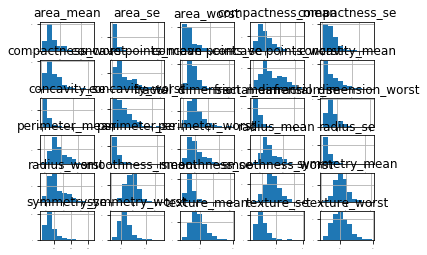

In [18]:
#histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
pyplot.show()

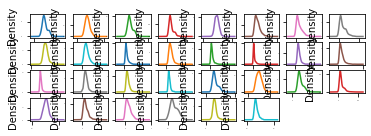

In [19]:
#density plots
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1)
pyplot.show()

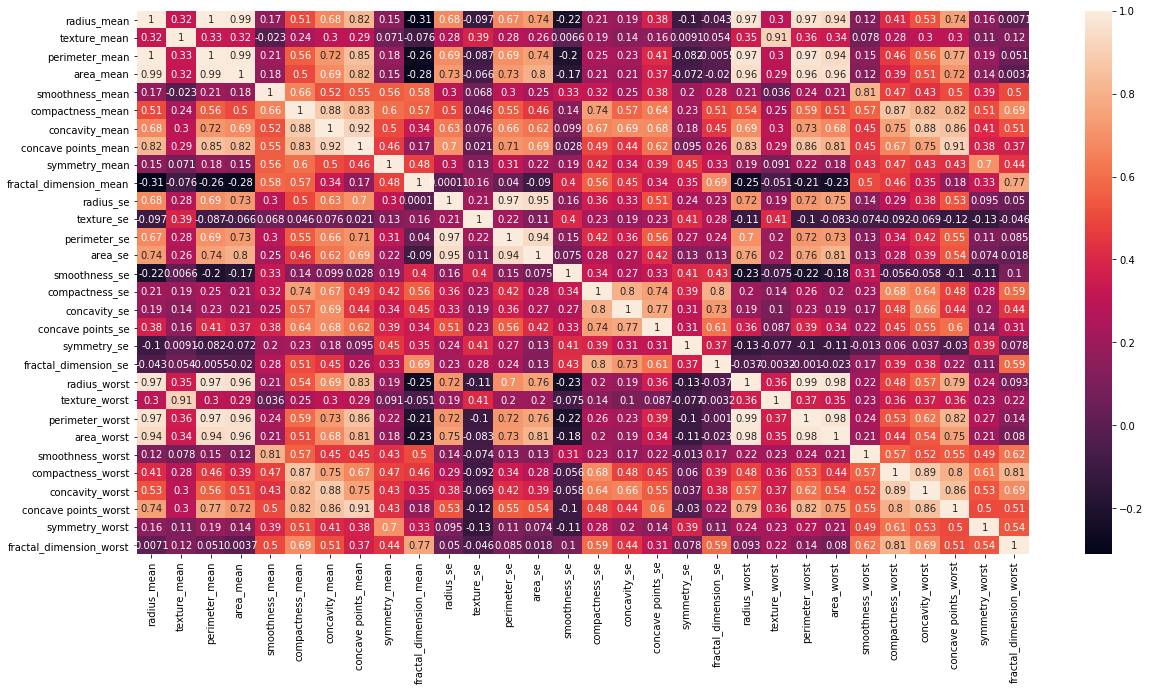

In [20]:
#correlation matrix
set_option('precision', 2)
pyplot.figure(figsize=(20,10))
seaborn.heatmap(dataset.corr(method='pearson'), annot=True)
pyplot.show()

# 2. Split the data: train and val data

In [36]:
#split-out validation dataset
array = dataset.values
X = array[:,1:31].astype(float)
Y = array[:,0]
val_size = 0.2
seed = 7
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape

((455, 30), (455,), (114, 30), (114,))

# 3. Evaluate some algorithms without pre-processing

In [37]:
#test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [38]:
#spot-check algorithms
models = dict()
models['LR'] = LogisticRegression()
models['LDA'] = LinearDiscriminantAnalysis()
models['KNN'] = KNeighborsClassifier()
models['CART'] = DecisionTreeClassifier()
models['NB'] = GaussianNB()
models['SVM'] = SVC()
models['AB'] = AdaBoostClassifier()
models['GBM'] = GradientBoostingClassifier()
models['RF'] = RandomForestClassifier()
models['ET'] = ExtraTreesClassifier()
#evaluate each model in turn
results = []
names = []
for name, model in models.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.938551 (+-0.036310)
LDA: 0.953865 (+-0.033254)
KNN: 0.934251 (+-0.036500)
CART: 0.918792 (+-0.052129)
NB: 0.936280 (+-0.031752)
SVM: 0.907536 (+-0.055156)
AB: 0.964879 (+-0.034203)
GBM: 0.953913 (+-0.031637)
RF: 0.956039 (+-0.022132)
ET: 0.962754 (+-0.029242)


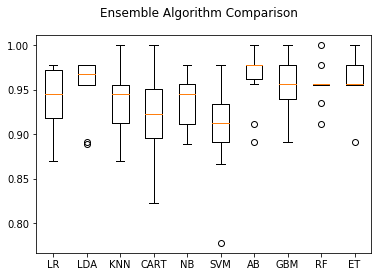

In [39]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

It seems that the best models are LDA and AB, with mean accuracy values of 0.9538 and 0.9648

# 4. Evaluate some algorithms pre-processing the data

In [40]:
#standardize the dataset
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.971401 (+-0.029462)
ScaledLDA: 0.953865 (+-0.033254)
ScaledKNN: 0.953961 (+-0.040699)
ScaledCART: 0.920966 (+-0.048504)
ScaledNB: 0.936280 (+-0.033143)
ScaledSVM: 0.964831 (+-0.020203)
ScaledAB: 0.964879 (+-0.034203)
ScaledGBM: 0.956135 (+-0.029243)
ScaledRF: 0.953865 (+-0.023027)
ScaledET: 0.962657 (+-0.027832)


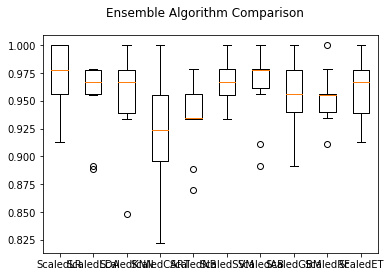

In [41]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Accuracy scores have been improved. Now the best two models are Logistic Regression and SVM, accuracies of 0.9714 and 0.9648.

For the moment the best model is LR and Standardizing the data (accuracy of 0.9714). Let's see if we can improve the accuracy with some feature selection methods.

# 5. Evaluate models with univariate feature selection method

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [43]:
#feature extraction
test = SelectKBest(score_func=chi2, k=15)
fit = test.fit(X_train, Y_train)
#summarize scores
features = fit.transform(X_train)
#summarize selected features
print(features)
features.shape

[[1.344e+01 2.158e+01 8.618e+01 ... 2.043e-01 2.085e-01 1.112e-01]
 [1.617e+01 1.607e+01 1.063e+02 ... 2.550e-01 2.114e-01 1.251e-01]
 [1.090e+01 1.296e+01 6.869e+01 ... 8.294e-02 1.854e-02 3.953e-02]
 ...
 [1.169e+01 2.444e+01 7.637e+01 ... 3.251e-01 1.395e-01 1.308e-01]
 [1.377e+01 2.229e+01 9.063e+01 ... 3.122e-01 3.809e-01 1.673e-01]
 [8.671e+00 1.445e+01 5.442e+01 ... 7.057e-02 0.000e+00 0.000e+00]]


(455, 15)

In [44]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, features, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.956039 (+-0.041507)
ScaledLDA: 0.945121 (+-0.038291)
ScaledKNN: 0.942802 (+-0.035853)
ScaledCART: 0.923140 (+-0.046556)
ScaledNB: 0.929614 (+-0.033929)
ScaledSVM: 0.947246 (+-0.040670)
ScaledAB: 0.944976 (+-0.035959)
ScaledGBM: 0.947391 (+-0.032652)
ScaledRF: 0.949517 (+-0.024140)
ScaledET: 0.960531 (+-0.023436)


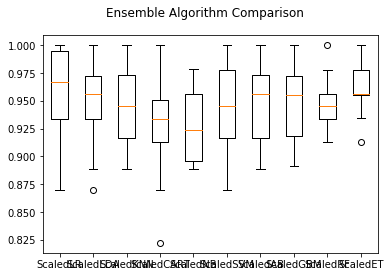

In [45]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The accuracy has not been improved from the previous one (0.9714). But the overall performance of all the models has been improved with this feature selection method.

# 5. Evaluate models with Recursive feature elimination

In [35]:
from sklearn.feature_selection import RFE

In [87]:
#feature extraction
model = LogisticRegression()
rfe = RFE(model,10)
fit = rfe.fit(X_train,Y_train)
#summarize scores
print('Num Features: %d' % fit.n_features_)
print('Selected Features: %s' % fit.support_)
print('Feature Ranking: %s' % fit.ranking_)

Num Features: 10
Selected Features: <class 'numpy.ndarray'>
Feature Ranking: [ 1  5  2 20  4 13  1  1  3 18  1  1  7 11 21 14  8 16 17 19  1  1  9 15
 12 10  1  1  1  6]


In [52]:
features = X_train[:,fit.support_]
features.shape

(455, 10)

In [53]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, features, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.960386 (+-0.027621)
ScaledLDA: 0.960628 (+-0.041019)
ScaledKNN: 0.945024 (+-0.037065)
ScaledCART: 0.927633 (+-0.033697)
ScaledNB: 0.942754 (+-0.030065)
ScaledSVM: 0.956039 (+-0.027886)
ScaledAB: 0.960435 (+-0.027498)
ScaledGBM: 0.949517 (+-0.031066)
ScaledRF: 0.945072 (+-0.024660)
ScaledET: 0.960483 (+-0.027374)


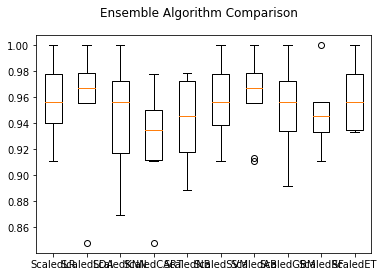

In [54]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The accuracy has not been improved from the previous one (0.9714). But the overall performance of all the models has been improved with this feature selection method.

# 6. Evaluate models with Principal Component Analysis (PCA)

In [55]:
from sklearn.decomposition import PCA

In [56]:
#feature extraction
pca = PCA(n_components=10)
fit = pca.fit(X_train)
#summarize scores
print('Explained Variance: %s' % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.81452460e-01 1.66884564e-02 1.64817477e-03 1.13852822e-04
 8.50722149e-05 6.57903609e-06 4.01404286e-06 7.72824225e-07
 3.57028906e-07 1.58078403e-07]
[[ 5.07476161e-03  2.19606398e-03  3.49802177e-02  5.18353246e-01
   4.22107252e-06  3.92566561e-05  8.18458512e-05  4.76614346e-05
   7.45476180e-06 -2.69933359e-06  3.20976732e-04 -5.26687338e-05
   2.29305231e-03  5.75528733e-02 -8.32853165e-07  5.28849075e-06
   8.59587276e-06  3.23327695e-06 -8.13317090e-07 -1.41518475e-07
   7.10427299e-03  2.98218042e-03  4.90182494e-02  8.51043957e-01
   6.10686329e-06  9.82791105e-05  1.67107597e-04  7.22846828e-05
   1.85545484e-05  1.20814702e-06]
 [ 9.06218680e-03 -3.68073139e-03  6.17676935e-02  8.50242065e-01
  -1.22651403e-05  9.96328733e-06  8.92205509e-05  5.28205458e-05
  -1.11922745e-05 -1.38044294e-05  5.53448382e-05  4.27099766e-04
   1.66974444e-03  2.31586151e-02  9.77923269e-07  1.42891851e-05
   2.88240911e-05  9.38858232e-06  1.67059322e-05  4.75509541e-07

In [58]:
features = pca.transform(X_train)
features.shape

(455, 10)

In [59]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, features, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.949517 (+-0.045153)
ScaledLDA: 0.940725 (+-0.040612)
ScaledKNN: 0.894493 (+-0.049968)
ScaledCART: 0.914444 (+-0.036957)
ScaledNB: 0.898841 (+-0.034705)
ScaledSVM: 0.958213 (+-0.028601)
ScaledAB: 0.936280 (+-0.035941)
ScaledGBM: 0.940483 (+-0.026515)
ScaledRF: 0.949420 (+-0.026325)
ScaledET: 0.951739 (+-0.031994)


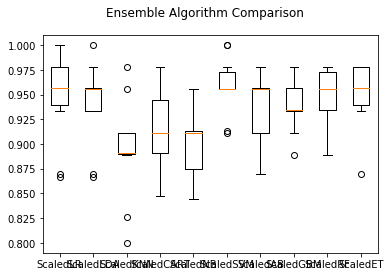

In [60]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In this case the classification accuracy has been worse in all the models.

# 7. Evaluate models with feature importance

In [89]:
#feature extraction
model = ExtraTreesClassifier()
model.fit(X_train, Y_train)
#summarize scores
print(model.feature_importances_)

[0.04406328 0.01447964 0.06182041 0.0475044  0.01058707 0.01765973
 0.03436831 0.10027279 0.00760747 0.00540335 0.03352576 0.00480156
 0.02717208 0.04415919 0.00667023 0.00578003 0.00732446 0.00815928
 0.00557123 0.0061498  0.08902906 0.03168548 0.070148   0.08639197
 0.02763952 0.02280947 0.05592949 0.09855037 0.01416501 0.01057157]


In [94]:
feats_idx = numpy.arange(0,30,1)
columns = numpy.zeros((30), dtype=bool)
for i in feats_idx :
    if model.feature_importances_[i] >= 0.04 :
        columns[i] = True
features = X_train[:,columns]
features.shape

(455, 10)

In [95]:
#evaluate models
pipelines = dict()
pipelines['ScaledLR'] = Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])
pipelines['ScaledLDA'] = Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])
pipelines['ScaledKNN'] = Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])
pipelines['ScaledCART'] = Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])
pipelines['ScaledNB'] = Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])
pipelines['ScaledSVM'] = Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])
pipelines['ScaledAB'] = Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])
pipelines['ScaledGBM'] = Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])
pipelines['ScaledRF'] = Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])
pipelines['ScaledET'] = Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])
#evaluate each model in turn
results = []
names = []
for name, model in pipelines.items() :
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, features, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%s: %f (+-%f)" % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.956135 (+-0.021939)
ScaledLDA: 0.945169 (+-0.032906)
ScaledKNN: 0.942899 (+-0.035412)
ScaledCART: 0.927585 (+-0.039169)
ScaledNB: 0.929614 (+-0.032636)
ScaledSVM: 0.942947 (+-0.034101)
ScaledAB: 0.936473 (+-0.039356)
ScaledGBM: 0.942995 (+-0.029638)
ScaledRF: 0.949517 (+-0.026106)
ScaledET: 0.962754 (+-0.019558)


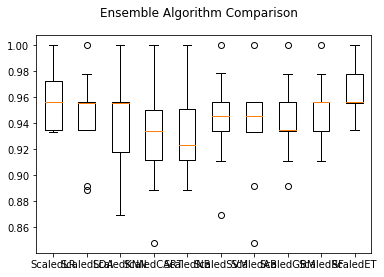

In [96]:
#compare algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In this case the classification accuracy has not been improve.

# 8. Evaluate models with balancing methods

# 9. Tunne parameters of the best model (LR with Standardization)
Estimated accuracy = 0.9714

In [98]:
#tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
iters = [50, 100, 150, 200, 250, 300, 350, 400]
param_grid = dict(C=c_values, solver=kernel_values, max_iter=iters)
model = LogisticRegression(random_state=7)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
#print the results of the param grid
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params) :
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982464 using {'C': 0.1, 'max_iter': 50, 'solver': 'liblinear'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 50, 'solver': 'newton-cg'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 50, 'solver': 'lbfgs'}
0.982464 (0.021331) with: {'C': 0.1, 'max_iter': 50, 'solver': 'liblinear'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 50, 'solver': 'sag'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 50, 'solver': 'saga'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 100, 'solver': 'newton-cg'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
0.982464 (0.021331) with: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 100, 'solver': 'sag'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 100, 'solver': 'saga'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 150, 'solver': 'newton-cg'}
0.975894 (0.020593) with: {'C': 0.1, 'max_iter': 150, 'solver': 'lbfgs'}
0.982464 (0.021331) with: {'C': 0.1, 'max_it

It seems that the best accuracy is obtained with C = 0.1, max_iter = 50 and solver = 'liblinear'.
Estimated accuracy of 0.982464

# 10. Finalize model

In [99]:
#prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression(C=0.1, max_iter=50, solver='liblinear')
model.fit(rescaledX, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#estimate accuracy on validation dataset
rescaledValX = scaler.transform(X_val)
predictions = model.predict(rescaledValX)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

0.9649122807017544
[[74  0]
 [ 4 36]]
              precision    recall  f1-score   support

           B       0.95      1.00      0.97        74
           M       1.00      0.90      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 1, 'Confusion matrix')

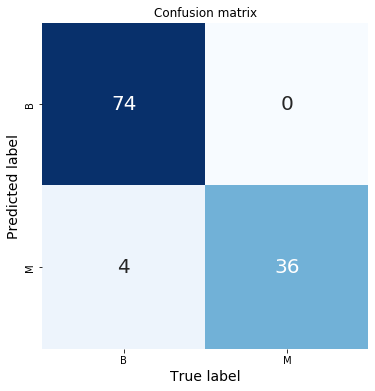

In [102]:
#plot the confusion matrix
pyplot.figure(figsize = (8,6))
seaborn.heatmap(confusion_matrix(Y_val, predictions), square=True, annot=True, annot_kws={"size": 20},
                cmap=pyplot.cm.Blues, cbar=False, xticklabels=['B', 'M'], yticklabels=['B', 'M'])
pyplot.xlabel('True label', fontsize=14)
pyplot.ylabel('Predicted label', fontsize=14)
pyplot.title('Confusion matrix')

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer

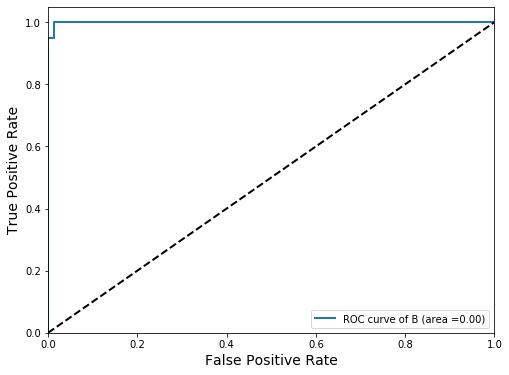

AUC:  0.9993243243243244


In [123]:
y_prob = model.predict_proba(rescaledValX)
lb = LabelBinarizer()
y_test = lb.fit_transform(Y_val)
classes = ['B','M']
#Compute and plot ROC curve and ROC area for each class
pyplot.figure(figsize = (8,6))
fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
pyplot.plot(fpr, tpr, lw=2, label=label)
pyplot.plot([0, 1], [0, 1], 'k--', lw=2)
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate', fontsize=14)
pyplot.ylabel('True Positive Rate', fontsize=14)
#plt.title('ROC Curves for subject %d' % (subject), fontisize=18)
pyplot.legend(loc="lower right")
pyplot.show()
print('AUC: ', roc_auc)